# Projeto 2 - Classificação usando dados de Cancer de Mama
## Breast Cancer Coimbra Data Set - UCI

## Introdução

O conjunto de dados de Cancer Mama esta localizado na plataforma UCI no seguinte link - https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra. O objetivo deste conjunto de dados é classificar se um individuo possui ou não cancer de mama a partir destas variaveis obtidas através do exame de sangue.


Segue a descrição das variaveis:
- Age: idade em anos
- BMI: indice de massa corporal (kg/m2)
- Glucose: nivel de glicose no sangue (mg/dL)
- Insulin: nivel de insulina no sangue (µU/mL)
- HOMA: nivel de resistencia a insulina
- Leptin: leptina (ng/mL)
- Adiponectin: Adiponectina (µg/mL)
- Resistin: Resistina (ng/mL)
- MCP-1: nivel de proteina MCP-1 (pg/dL)
- Classification: é classificado como 1 sem cancer (grupo controle) e 2 com cancer (grupo paciente)

Para mais informações, segue o link do artigo: https://bmccancer.biomedcentral.com/articles/10.1186/s12885-017-3877-1

#### referencia: 
Patrício, M., Pereira, J., Crisóstomo, J., Matafome, P., Gomes, M., Seiça, R., & Caramelo, F. (2018). Using Resistin, glucose, age and BMI to predict the presence of breast cancer. BMC Cancer, 18(1).

# Sobre este projeto

Neste projeto treine os conhecimentos aprendidos até o momento e que entenda algumas das dificuldades que pode ter quando for aplicar os mesmos. 

Os principais pontos que serão avaliados:

- Levantamento de hipoteses
- Manipulação de dados e criação de gráficos simples com o `Pandas`
- Criar um modelo usando regressão logistica e justificar

# Preparação do ambiente

- Acessem o link - https://archive.ics.uci.edu/ml/machine-learning-databases/00451/dataR2.csv e faça o download do conjunto de dados.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('./dataR2.csv')

In [3]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [4]:
data.tail(3)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,2
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,2
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [6]:
data['Classification'] = data['Classification'].astype(np.int64)

In [7]:
correlacao = data.corr()[['Classification']].sort_values(by='Classification', ascending=False)
correlacao

,Classification
Classification,1.000000
Glucose,0.384315
HOMA,0.284012
Insulin,0.276804
Resistin,0.227310
MCP.1,0.091381
Leptin,-0.001078
Adiponectin,-0.019490
Age,-0.043555
BMI,-0.132586


In [8]:
data['Classification'] = data['Classification'].apply(lambda x: 'Negativo' if x==1 else 'Positivo')

In [9]:
data.tail()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
111,45,26.85,92,3.33,0.755688,54.68,12.10,10.96,268.23,Positivo
112,62,26.84,100,4.53,1.117400,12.45,21.42,7.32,330.16,Positivo
113,65,32.05,97,5.73,1.370998,61.48,22.54,10.33,314.05,Positivo
114,72,25.59,82,2.82,0.570392,24.96,33.75,3.27,392.46,Positivo
115,86,27.18,138,19.91,6.777364,90.28,14.11,4.35,90.09,Positivo


In [10]:
data.rename({
        'Age': 'Idade', 
        'BMI': 'IMC', 
        'Glucose': 'Glicose', 
        'Insulin': 'Insulina',  
        'Leptin': 'Leptina', 
        'Adiponectin': 'Adiponectina',
        'Resistin': 'Resistina',
        'Classification': 'Diagnóstico'
    }, axis=1, inplace=True)

In [11]:
data.head()

,Idade,IMC,Glicose,Insulina,HOMA,Leptina,Adiponectina,Resistina,MCP.1,Diagnóstico
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Negativo
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Negativo
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Negativo
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Negativo
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Negativo


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Idade         116 non-null    int64  
 1   IMC           116 non-null    float64
 2   Glicose       116 non-null    int64  
 3   Insulina      116 non-null    float64
 4   HOMA          116 non-null    float64
 5   Leptina       116 non-null    float64
 6   Adiponectina  116 non-null    float64
 7   Resistina     116 non-null    float64
 8   MCP.1         116 non-null    float64
 9   Diagnóstico   116 non-null    object 
dtypes: float64(7), int64(2), object(1)
memory usage: 9.2+ KB


In [13]:
data.describe()

,Idade,IMC,Glicose,Insulina,HOMA,Leptina,Adiponectina,Resistina,MCP.1
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000


# Exercicio 1. (2.0 pontos)

Escreva em até quatro frases, uma breve apresentação sobre suas ideias do conjunto de dados e adicione qualquer contexto que possa ajudar os leitores a entendê-la.

**RESPOSTA** (VALE 2.0 pontos): (responda aqui, dê dois cliques para editar. Esta célula de texto esta escrito em Markdown, para renderizar o texto execute a célula com **Shift+Enter**)

Pesquisando sobre as variáveis, percebe-se que são parâmetros de distúrbios metabólicos. Leptina, Aiponectina, Resistina e MCP-1, são ligados à resistência à insulina, com produção no tecido adiposo. O índice de HOMA por sua vez, é ligado à quantidade de insulina e glicose. Já observando a correlação entre os parâmetros, é possível perceber uma significante correlação entre Glicose, HOMA, Insulina e Resistina com diagnóstico positivo. Impotante mencionar no entanto, a correlação negativa significante do IMC(BMI) com diagnósticos positivos, ou seja, quanto mais alto o IMC, menos a chance do diagnóstico dar positivo.

In [14]:
correlacao

,Classification
Classification,1.000000
Glucose,0.384315
HOMA,0.284012
Insulin,0.276804
Resistin,0.227310
MCP.1,0.091381
Leptin,-0.001078
Adiponectin,-0.019490
Age,-0.043555
BMI,-0.132586


# Exercicio 2. (3.0 pontos)

Explore seu conjunto de dados e crie uma história em torno deles! Pense sobre o objetivo que deseja transmitir para seus leitores.

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

Você precisa criar uma visualização explicativa, ajudando o leitor a identificar uma ou mais ideias-chave no conjunto de dados. Assim, qual visualização você acha interessante destacar?

In [15]:
#### VALE 0.6 pontos
#### CONSTRUA OS SEUS GRAFICOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
data['Idade'].describe()

count    116.000000
mean      57.301724
std       16.112766
min       24.000000
25%       45.000000
50%       56.000000
75%       71.000000
max       89.000000
Name: Idade, dtype: float64

In [16]:
data['Glicose'].describe()

count    116.000000
mean      97.793103
std       22.525162
min       60.000000
25%       85.750000
50%       92.000000
75%      102.000000
max      201.000000
Name: Glicose, dtype: float64

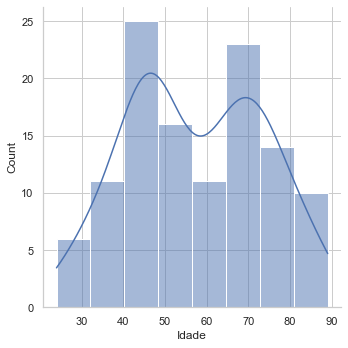

In [17]:
sns.set_theme(style="whitegrid")
sns.displot(x='Idade', data=data, kde=True);

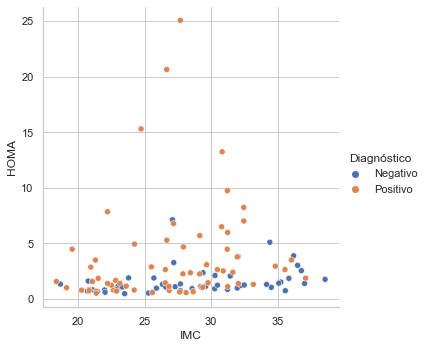

In [18]:
sns.relplot(data=data, x='IMC', y='HOMA', hue='Diagnóstico')

Vamos classificar o índice de glicose das pacientes.

**Lembrando:**
- Glicose < 100 = Normal
- Glicose entre 101 e 125 = pré-diabético
- Glicose > 125 = Diabético

Vale mencionar no entanto, que os valores de glicose são para o dia da coleta do sangue, portanto podem haver pessoas diabéticas com a glicose em nível normal, provavelmente controlada por tratamento.

In [19]:
def is_diabetic(x):
    if x >= 126:
        return 'Diabético'
    elif 100 <= x <= 125:
        return 'Pré-Diabético'
    elif x < 100:
        return 'Normal'

In [20]:
data['Diabetes'] = data['Glicose'].apply(is_diabetic)

In [21]:
data.head()

,Idade,IMC,Glicose,Insulina,HOMA,Leptina,Adiponectina,Resistina,MCP.1,Diagnóstico,Diabetes
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,Negativo,Normal
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,Negativo,Normal
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,Negativo,Normal
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,Negativo,Normal
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,Negativo,Normal


Cruzando as informações entre índice glicêmico e daignóstico, é possível notar uma alta proporção de diagnósticos positivos em pessoas classificadas como diabéticas ou pré-diabéticas.

Lembrando mais uma vez que as pacientes classificadas como "Normal" também tem a possibilidade de serem diabéticas, porém como controle glicêmico devido a tratamento.

In [22]:
pd.crosstab(data['Diabetes'], data['Diagnóstico'], margins=True)

Diagnóstico,Negativo,Positivo,All
Diabetes,,,
Diabético,0,11,11
Normal,44,34,78
Pré-Diabético,8,19,27
All,52,64,116


In [23]:
 #df_diabetes_classificacao = pd.crosstab(data['Diabetes'], data['Diagnóstico'] ).reindex(["Normal", "Pré-Diabético", "Diabético"])

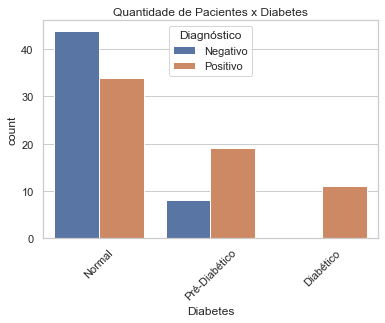

In [24]:
plt.title('Quantidade de Pacientes x Diabetes')
plt.legend(title='Diagnóstico', loc='upper right', labels=['Negativo', 'Positivo'])
plt.xticks(rotation=45);
sns.countplot(x='Diabetes', hue='Diagnóstico', data=data);

Vamos classificar também o IMC:

In [25]:
def classificate_imc(x):
    if x <= 18.5:  # baixo peso
        return 'Peso Baixo'  
    elif 18.5 < x < 25:  # peso normal
        return 'Peso Normal'
    elif 25 <= x < 30:  # sobrepeso
        return 'Sobrepeso'
    elif 30 <= x < 35:  # obesidade
        return 'Obeso'
    elif 35 <= x < 40:  # obesidade grave
        return 'Obeso Grave'
    elif x >= 40:  # obesidade mórbida
        return 'Obeso Mórbido'

In [26]:
data['imc_class'] = data['IMC'].apply(classificate_imc)

Verificando o índice HOMA, percebemos maior chance de índice positivo para valores acima de 2,5.

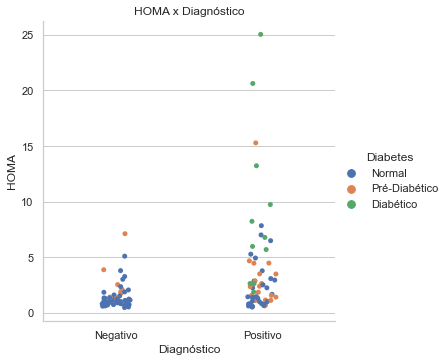

In [27]:
sns.catplot(x='Diagnóstico', y='HOMA', hue='Diabetes', data=data)
plt.title('HOMA x Diagnóstico');

In [28]:
pd.crosstab(data['imc_class'], data['Diagnóstico'], margins=True).reindex(["Peso Baixo", "Peso Normal", "Sobrepeso", "Obeso", "Obeso Grave"])

Diagnóstico,Negativo,Positivo,All
imc_class,,,
Peso Baixo,0,1,1
Peso Normal,17,22,39
Sobrepeso,14,23,37
Obeso,12,15,27
Obeso Grave,9,3,12


In [29]:
#df_imc_classificacao = pd.crosstab(data['imc_class'], data['Diagnóstico']).reindex(["Peso Baixo", "Peso Normal", "Sobrepeso", "Obeso", "Obeso Grave"])

Vericando a distribuição do IMC, chama a atenção o fato de que pacientes com diagnóstico positivo e negativo para cancer, tem distribuição semelhante para valores de IMC.

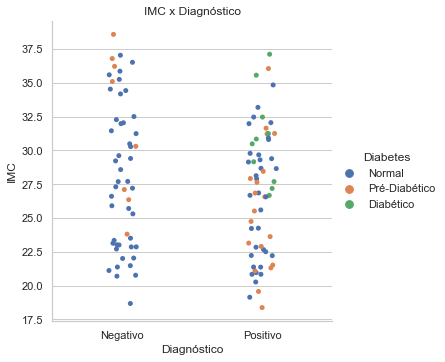

In [30]:
sns.catplot(x='Diagnóstico', y='IMC', hue='Diabetes', data=data)
plt.title('IMC x Diagnóstico');

Verificando o gráfico a seguir, vale mencionar que dianósticos positivos começam depois dos 30 anos de idade. A partir dos 40, a probabilidade da paciente ser diagnosticaada com cancer de mama aumenta drasticamente.

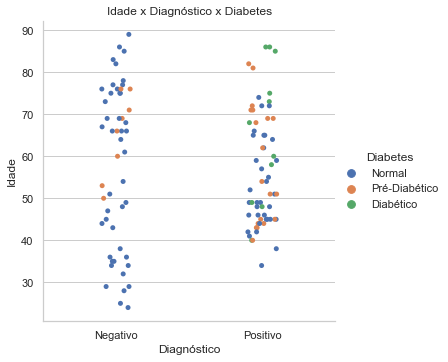

In [31]:
sns.catplot(x='Diagnóstico', y='Idade', hue='Diabetes', data=data)
plt.title('Idade x Diagnóstico x Diabetes');

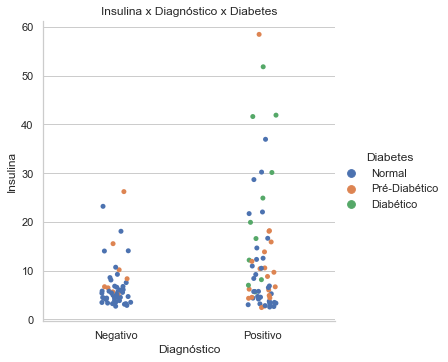

In [32]:
sns.catplot(x='Diagnóstico', y='Insulina', hue='Diabetes', data=data)
plt.title('Insulina x Diagnóstico x Diabetes');

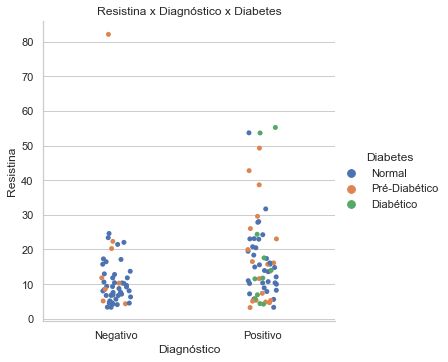

In [33]:
sns.catplot(x='Diagnóstico', y='Resistina', hue='Diabetes', data=data)
plt.title('Resistina x Diagnóstico x Diabetes');

O gráfico Idade x IMC, no entanto, não nos mostra nada significante quando é colocada um layer de classificação do IMC. 

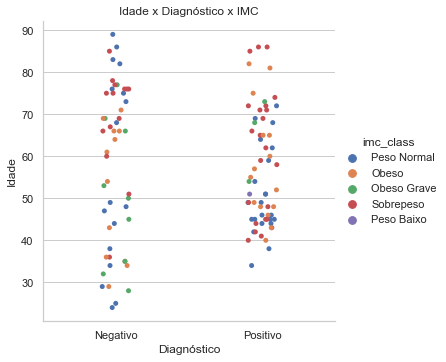

In [34]:
sns.catplot(x='Diagnóstico', y='Idade', hue='imc_class', data=data)
plt.title('Idade x Diagnóstico x IMC');

Mais uma vez, índice de glicose aumenta as chances de um paciente ter diagnóstico positivo.

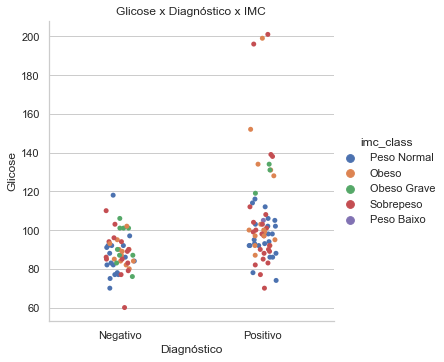

In [35]:
sns.catplot(x='Diagnóstico', y='Glicose', hue='imc_class', data=data)
plt.title('Glicose x Diagnóstico x IMC');

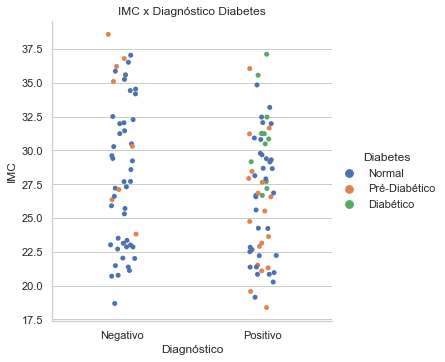

In [36]:
sns.catplot(x='Diagnóstico', y='IMC', hue='Diabetes', data=data)
plt.title('IMC x Diagnóstico Diabetes');

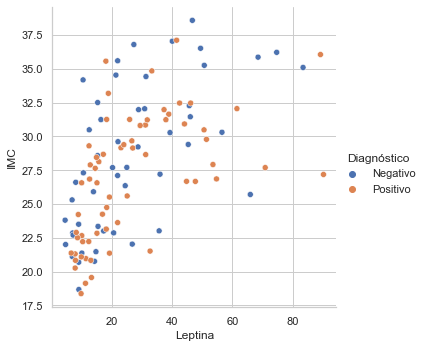

In [37]:
sns.relplot(y='IMC', x='Leptina', hue='Diagnóstico', data=data);

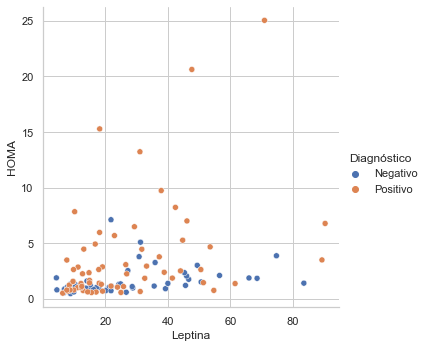

In [38]:
sns.relplot(y='HOMA', x='Leptina', hue='Diagnóstico', data=data);

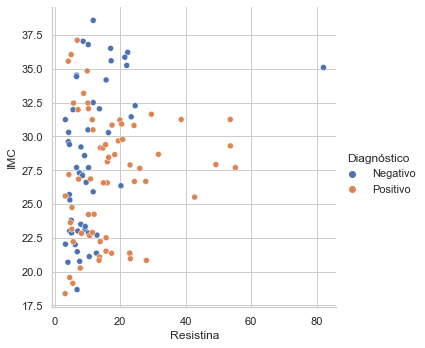

In [39]:
sns.relplot(y='IMC', x='Resistina', hue='Diagnóstico', data=data);

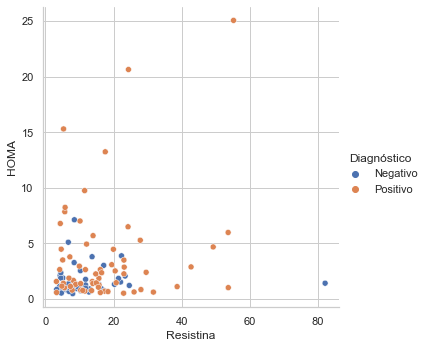

In [40]:
sns.relplot(y='HOMA', x='Resistina', hue='Diagnóstico', data=data);

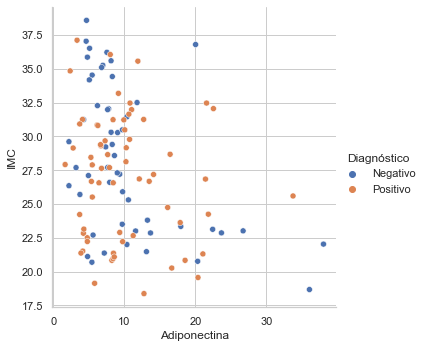

In [41]:
sns.relplot(x='Adiponectina', y='IMC', hue='Diagnóstico', data=data);

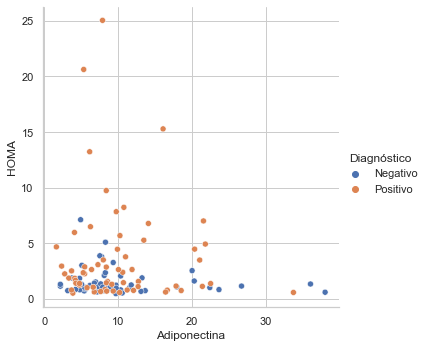

In [42]:
sns.relplot(x='Adiponectina', y='HOMA', hue='Diagnóstico', data=data);

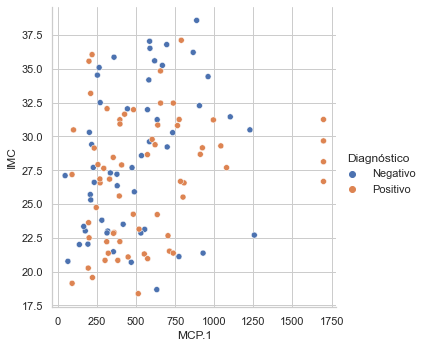

In [43]:
sns.relplot(x='MCP.1', y='IMC', hue='Diagnóstico', data=data);

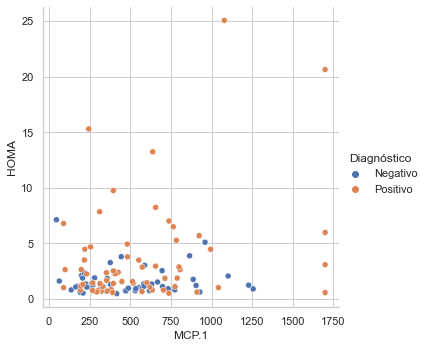

In [44]:
sns.relplot(x='MCP.1', y='HOMA', hue='Diagnóstico', data=data);

Obtenha o feedback de suas ideias e de sua(s) visualização(ões), se possivel apresente esse grafico com pelo menos uma outra pessoa e questione:

1. O que você percebe na visualização?
2. Quais perguntas você tem sobre o conjunto de dados?
3. Há algo que você não entende nas visualizações?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

é possível notar uma forte probabilidade de pacientes com índice de glicose alta terem diagnóstico positivo. Índices diretamente relacionados á Glicoes como HOMA e Insulina, cujos pacientes com valores terem maior probabilidae de terem diagnóstico positivo para cancer.
O IMC parece ter pouco influência sobre o câncer de mama. Entretanto, associamos obesidade à uma vida menos saudável do que uma pessoas com IMC normal. ou seja, é contra intuitivo. Acho que seria necessário investigar mais a respeito. A pergunta que fica é: "O IMC tem algum efeito no HOMA, Glicose/Insulina, Diabetes? Ou Seriam esses fatores determinantes do IMC". Caberia uma consulta com um especialista.
Para apresentação das conclusões, os feedbacks foram claros em dizer que não veem necessiade dos relplots.

Após o feedback, o que você mudaria?

**RESPOSTA** (VALE 0.6 pontos): (responda aqui, dê dois cliques para editar)

O feedback me deu a ideia de agrupar os gráficos semelhantes em esquemas de subplots.

Também não vejo a necessidade dos relplots para uma apresentação.

Apresente suas nova(s) visualização(ões) a partir do feedback:

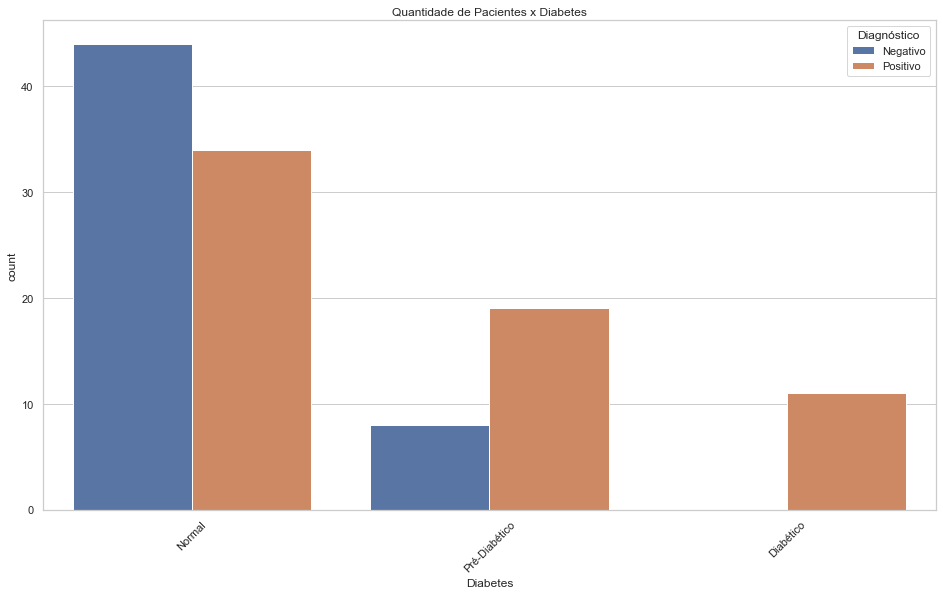

In [45]:
#### VALE 0.6 pontos
#### CONSTRUA O SEU GRAFICO ABAIXO, USE MAIS CELULAS SE NECESSARIO

plt.figure(figsize=(16,9))
plt.title('Quantidade de Pacientes x Diabetes')
plt.legend(title='Diagnóstico', loc='upper right', labels=['Negativo', 'Positivo'])
plt.xticks(rotation=45);
sns.countplot(x='Diabetes', hue='Diagnóstico', data=data)
plt.show()

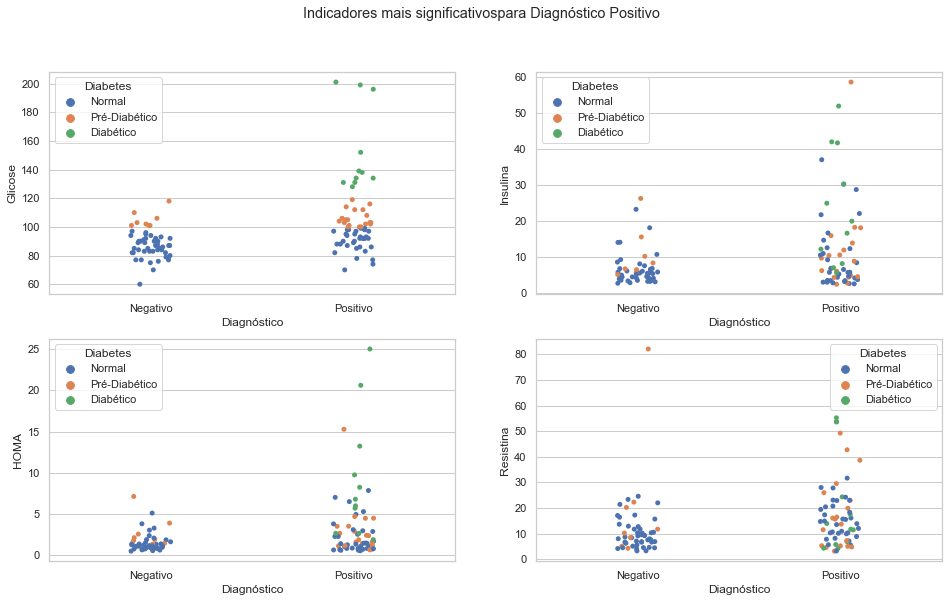

In [46]:
f, ax = plt.subplots(2,2, figsize=(16,9))
f.suptitle('Indicadores mais significativospara Diagnóstico Positivo')

sns.stripplot(ax=ax[0,0],x='Diagnóstico', y='Glicose', hue='Diabetes', data=data)

sns.stripplot(ax=ax[0,1], x='Diagnóstico', y='Insulina', hue='Diabetes', data=data)

sns.stripplot(ax=ax[1,0], x='Diagnóstico', y='HOMA', hue='Diabetes', data=data)

sns.stripplot(ax=ax[1,1], x='Diagnóstico', y='Resistina', hue='Diabetes', data=data)

plt.show()

# Exercicio 3. (5.0 pontos)

Construa um modelo de regressão logistica para predizer a variável **Classification** com **statsmodels.api**.

In [47]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO
import statsmodels.api as sm

In [48]:
df = pd.read_csv('./dataR2.csv')
df['Classification'] = df['Classification'].astype(np.int64)

In [49]:
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [50]:
df.Classification.unique()

array([1, 2], dtype=int64)

In [51]:
X = df.drop(['Classification'], axis = 1)
y = np.array(df['Classification'])

In [52]:
y[y == 1 ] = 0  # negativo
y[y == 2 ] = 1  # positivo

In [53]:
logit_model = sm.Logit(y, X)
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.493418
         Iterations 9


In [54]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  116
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.2826
Time:                        19:09:30   Log-Likelihood:                -57.236
converged:                       True   LL-Null:                       -79.783
Covariance Type:            nonrobust   LLR p-value:                 3.533e-07
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0284      0.015     -1.887      0.059      -0.058       0.001
BMI            -0.1767      0.065     -2.729      0.006      -0.304      -0.050
Glucose         0.0582      0.021      2.801      0.005       0.017       0.099
Insulin        -0.1560      0.262     -0.595      0.552      -0.670       0.358
HOMA            0.9939      1.132      0.878      0.380      -1.226       3.214
Leptin         -0.0066      0.017     -0.379      0.704      -0.041       0.027
Adiponectin    -0.0274      0.035     -0.781      0.435      -0.096       0.041
Resistin        0.0521      0.027      1.951      0.051      -0.000       0.104
MCP.1           0.0006      0.001      0.750      0.453      -0.001       0.002
===============================================================================
"""

Coloque abaixo a saida do seu modelo usando **seu_modelo.summary()**.

In [55]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  116
Model:                          Logit   Df Residuals:                      107
Method:                           MLE   Df Model:                            8
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.2826
Time:                        19:09:30   Log-Likelihood:                -57.236
converged:                       True   LL-Null:                       -79.783
Covariance Type:            nonrobust   LLR p-value:                 3.533e-07
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Age            -0.0284      0.015     -1.887      0.059      -0.058       0.001
BMI            -0.1767      0.065     -2.729      0.006      -0.304      -0.050
Glucose         0.0582      0.021      2.801    

Faça outro modelo usando a biblioteca **sklearn** e usem o parametro **random_state** com valor 10.

In [56]:
#### VALE 0.8 pontos
#### EXECUTE OS COMANDOS ABAIXO, USE MAIS CELULAS SE NECESSARIO

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

In [57]:
X = df.drop(['Classification'], axis = 1)
X_std = StandardScaler().fit_transform(X)

y = np.array(df['Classification'])
y[y == 1 ] = 0  # negativo
y[y == 2 ] = 1  # positivo

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2, random_state=10)

lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [59]:
mc = pd.DataFrame(confusion_matrix(y_test, y_pred), 
             columns=["Predito Positivo","Predito Negativo",],
             index  =["Verdadeiro Positivo", "Verdadeiro Negativo"])

Coloque abaixo a matriz de confusão do modelo feito:

<AxesSubplot:>

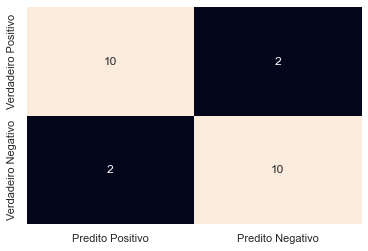

In [60]:
#### VALE 0.8 pontos
#### EXECUTE O COMANDO ABAIXO

sns.heatmap(data=mc, annot=True, cbar=False)

Prencha as métricas a partir da matriz de confusão obtida (lembrando que a classe negativa é 1 - sem cancer e a classe positiva é 2 - com cancer)

In [61]:
def get_metrics(data_frame):
    TN = data_frame.iloc[0,0]
    TP = data_frame.iloc[1,1]
    FP = data_frame.iloc[0,1]
    FN = data_frame.iloc[1,0]
    
    acuracia = (TP + TN)/(TP+TN+FP+FN)
    precisao = TP/(TP+FP)
    especificidade = TN/(TN+FP)
    sensitividade = TP/(TP+FN)
    
    return { 
            "acuracia": acuracia,
            "precisao": precisao,
            "especificidade": especificidade,
            "sensitividade": sensitividade
            }

In [62]:
metrics = get_metrics(mc)
metrics

{'acuracia': 0.8333333333333334,
 'precisao': 0.8333333333333334,
 'especificidade': 0.8333333333333334,
 'sensitividade': 0.8333333333333334}

In [63]:
# VALE 0.8 pontos
# Substitua __ pelos valores solicitados
print('acurácia: {}'.format(metrics['acuracia']))
print('precisão: {}'.format(metrics['precisao']))
print('especificidade: {}'.format(metrics['especificidade']))
print('sensitividade: {}'.format(metrics['sensitividade']))

acurácia: 0.8333333333333334
precisão: 0.8333333333333334
especificidade: 0.8333333333333334
sensitividade: 0.8333333333333334


Observando a matriz de confusão, o seu modelo tende a obter mais erros do tipo I ou do tipo II?

**RESPOSTA** (VALE 1.0 ponto): (responda aqui, dê dois cliques para editar)

As duas taxas de erro são iguais. Tanto Falso Positivo quanto Falso Negativo, o que resulta em modelo equilibrado, se pensarmos que tem a mesma possibilidade de ser falso tanto para Positivo quanto Negativo, com acurácia e precião de cerca de 83.33%.

Em um resultado para câncer de mama, é necessário que a especificidade e a sensitividade sejam próximas pois são taxas de verdadeiros negativos e verdadeiros positivos, respectivamente, pois imagine uma especificidade de 90% e sensitividade de 60%, sem pensar na coerencia dos valores por um momento. Um diagnóstico negativo teria apenas 10% de chance de ser positivo, isso seria ótimo, entretanto, um diagnóstico positivo teria 40% de chance de ser negativo, o que diminuiria em muito a confiabilidade no uso deste modelo.